In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from queue import Queue

In [4]:
f = open("./Free_TravelTime.txt", 'r')
free_times = f.read()

In [9]:
free_times_list = ast.literal_eval(free_times)

In [12]:
free_times = np.array(free_times_list)

In [13]:
free_times.shape

(2000, 2)

In [16]:
free_times = free_times[free_times[:,1]>free_times[:,0]]

In [17]:
free_times

array([[ 100.9,  112.4],
       [ 112.7,  124.9],
       [ 156.3,  169. ],
       ...,
       [4183.4, 4196.5],
       [4184.7, 4197.8],
       [4185.6, 4198.9]])

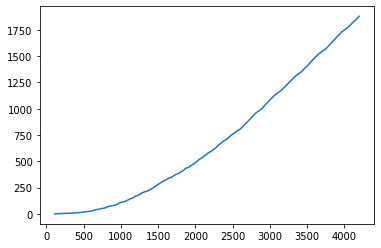

In [20]:
plt.plot(free_times[:,1], np.arange(len(free_times[:,1])))

In [22]:
free_flow_rate = np.gradient(np.arange(len(free_times[:,1])), free_times[:,1])

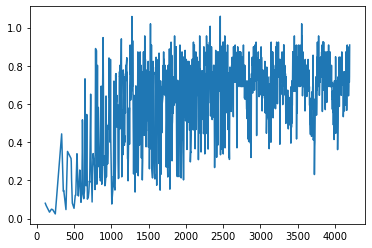

In [24]:
plt.plot(free_times[:,1], free_flow_rate)

In [74]:
N = 100
free_flow_avg = np.convolve(free_flow_rate, np.ones(N)/N, mode='valid')

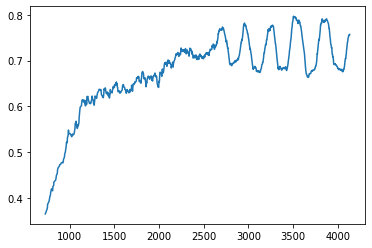

In [98]:
edge = (len(free_times[:,1]) - len(free_flow_avg))//2
plt.plot(free_times[:,1][edge+1:-edge], free_flow_avg)

In [132]:
f = np.poly1d(np.polyfit(free_times[:,1][edge+1:-edge], free_flow_avg, 3))

In [133]:
x = free_times[:,1][edge+1:-edge]
y = free_flow_avg
xp = np.linspace(0,4200,4200)

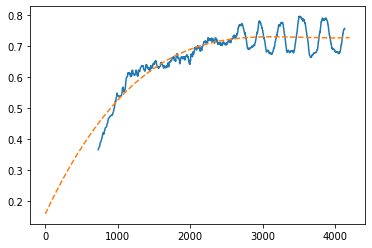

In [134]:
plt.plot(x, y, '-', xp, f(xp), '--')

In [107]:
free_times

array([[ 100.9,  112.4],
       [ 112.7,  124.9],
       [ 156.3,  169. ],
       ...,
       [4183.4, 4196.5],
       [4184.7, 4197.8],
       [4185.6, 4198.9]])

In [108]:
arr_times = free_times[:,0]
dep_times = free_times[:,1]

In [109]:
i, j = 0, 0
q = Queue()
density_with_time = []
while(i+j<2*len(arr_times)):
    if(i < len(arr_times)):
        a_t = arr_times[i]
    else:
        a_t = np.inf
    d_t = dep_times[j]
    if(a_t<d_t):
        q.put(0)
        i = i+1
        density_with_time.append([q.qsize(),a_t])
        continue
    else:
        q.get()
        j = j+1
        density_with_time.append([q.qsize(),d_t])
        continue

In [110]:
density_with_time = np.array(density_with_time)

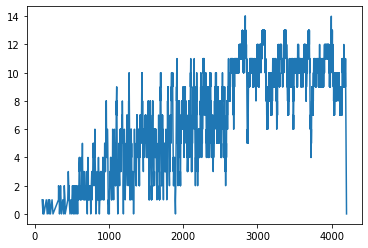

In [111]:
plt.plot(density_with_time[:,1], density_with_time[:,0])

In [112]:
N = 100
density_time_avg = np.convolve(density_with_time[:,0], np.ones(N)/N, mode='valid')

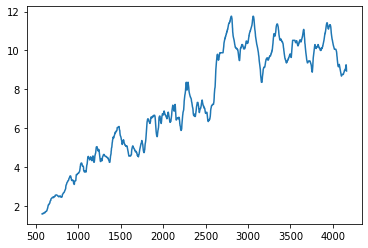

In [113]:
edge = (len(density_with_time[:,1]) - len(density_time_avg))//2
plt.plot(density_with_time[:,1][edge+1:-edge], density_time_avg)

In [117]:
k = np.poly1d(np.polyfit(density_with_time[:,1][edge+1:-edge], density_time_avg, 2))

In [118]:
x = density_with_time[:,1][edge+1:-edge]
y = density_time_avg
xp = np.linspace(0,4200,4200)

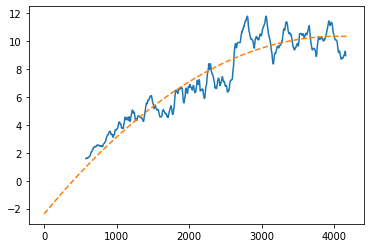

In [119]:
plt.plot(x, y, '-', xp, k(xp), '--')

(0.0, 12.0)

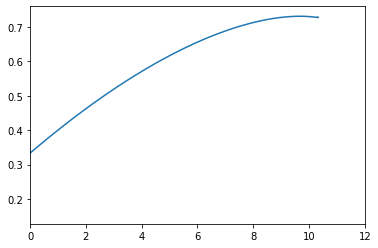

In [136]:
plt.plot(k(xp),f(xp))
plt.xlim(0,12)